In [11]:
import time
import umap
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target




/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP took 5.09 seconds


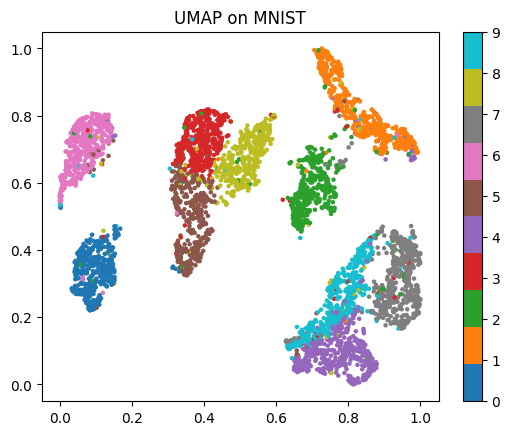

In [9]:
np.random.seed(42)

# For demonstration purposes, let's limit the dataset to 5000 samples
n_samples = 5000
X = X[:n_samples]
y = y[:n_samples]

# Timing UMAP
start_time = time.time()
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)
umap_time = time.time() - start_time

# Print the time
print(f"UMAP took {umap_time:.2f} seconds")

# Normalize the output of UMAP
X_umap_normalized = (X_umap - X_umap.min(axis=0)) / (X_umap.max(axis=0) - X_umap.min(axis=0))

data_to_save = np.column_stack((X_umap_normalized, y))
# Save UMAP projection and labels to .npy file
np.save('./data/mnist_umap.npy', data_to_save)

# Plotting the result
plt.scatter(X_umap_normalized[:, 0], X_umap_normalized[:, 1], c=y.astype(int), cmap='tab10', s=5)
plt.colorbar()
plt.title('UMAP on MNIST')
plt.show()

In [12]:
np.random.seed(42)

times = []
for n_samples in range(1000, 10001, 1000):
    # For demonstration purposes, let's limit the dataset to 5000 samples
    X_sub= X[:n_samples]
    y_sub = y[:n_samples]

    # Timing UMAP
    start_time = time.time()
    umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
    X_umap = umap_model.fit_transform(X_sub)
    umap_time = time.time() - start_time

    times.append(umap_time)
    
print(times)

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 

[1.6609816551208496, 3.59382963180542, 6.724499464035034, 9.919588088989258, 5.05280613899231, 6.045594215393066, 6.93833327293396, 7.948130130767822, 8.86552357673645, 10.15117073059082]


In [14]:
np.random.seed(42)

n_samples = 4000

# For demonstration purposes, let's limit the dataset to 5000 samples
X_sub= X[:n_samples]
y_sub = y[:n_samples]

# Timing UMAP
start_time = time.time()
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
X_umap = umap_model.fit_transform(X_sub)
umap_time = time.time() - start_time

print(umap_time)

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


9.966392040252686


/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


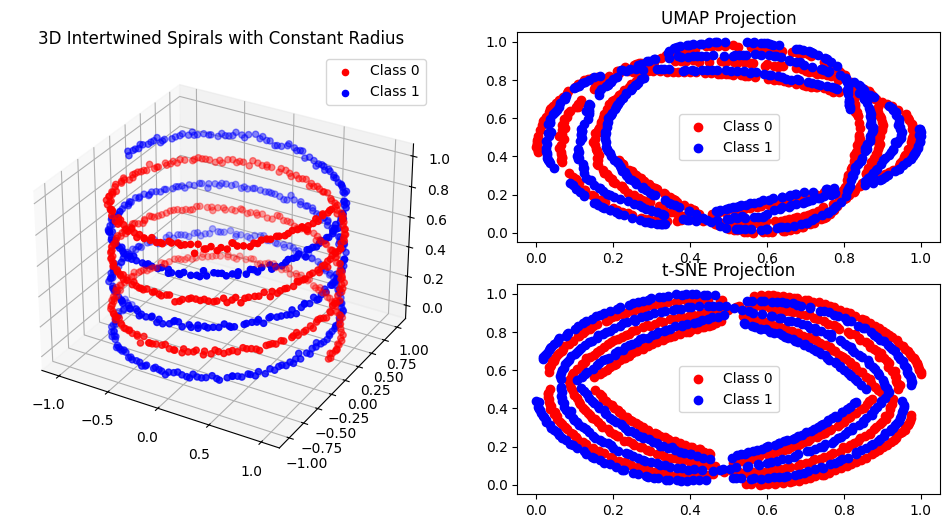

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate the data for two intertwined spirals with constant radius
def generate_spirals(n_points, radius=1, turns=3, noise=0.01):
    theta = np.linspace(0, turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    x1 = radius * np.cos(theta) + np.random.randn(n_points) * noise
    y1 = radius * np.sin(theta) + np.random.randn(n_points) * noise
    z1 = z + np.random.randn(n_points) * noise
    
    x2 = radius * np.cos(theta + np.pi) + np.random.randn(n_points) * noise
    y2 = radius * np.sin(theta + np.pi) + np.random.randn(n_points) * noise
    z2 = z + np.random.randn(n_points) * noise
    
    data = np.vstack((np.column_stack((x1, y1, z1)), np.column_stack((x2, y2, z2))))
    labels = np.hstack((np.zeros(n_points), np.ones(n_points)))
    
    return data, labels

# Create the dataset
n_points = 500
data, labels = generate_spirals(n_points)

# Plot the 3D spirals
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[labels == 0, 0], data[labels == 0, 1], data[labels == 0, 2], color='r', label='Class 0')
ax.scatter(data[labels == 1, 0], data[labels == 1, 1], data[labels == 1, 2], color='b', label='Class 1')
ax.set_title('3D Intertwined Spirals with Constant Radius')
ax.legend()

# Apply PCA
umap_model = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_model.fit_transform(data)

# Normalize the output of PCA
data_umap = (data_umap - data_umap.min(axis=0)) / (data_umap.max(axis=0) - data_umap.min(axis=0))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=100)
data_tsne = tsne.fit_transform(data)

# Normalize the output of t-SNE
data_tsne = (data_tsne - data_tsne.min(axis=0)) / (data_tsne.max(axis=0) - data_tsne.min(axis=0))

# Plot the 2D projections
ax2 = fig.add_subplot(222)
ax2.scatter(data_umap[labels == 0, 0], data_umap[labels == 0, 1], color='r', label='Class 0')
ax2.scatter(data_umap[labels == 1, 0], data_umap[labels == 1, 1], color='b', label='Class 1')
ax2.set_title('UMAP Projection')
ax2.legend()

ax3 = fig.add_subplot(224)
ax3.scatter(data_tsne[labels == 0, 0], data_tsne[labels == 0, 1], color='r', label='Class 0')
ax3.scatter(data_tsne[labels == 1, 0], data_tsne[labels == 1, 1], color='b', label='Class 1')
ax3.set_title('t-SNE Projection')
ax3.legend()

plt.show()


/tmp/ipykernel_501574/467218698.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='viridis', s=5)


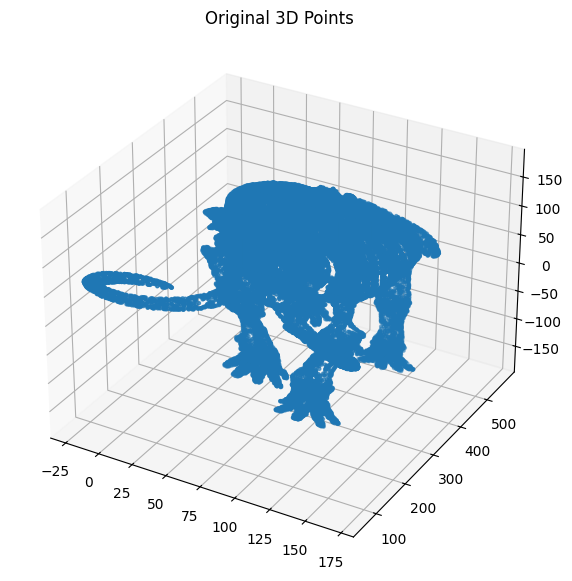

/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP took 76.73 seconds
t-SNE took 490.04 seconds


/tmp/ipykernel_501574/467218698.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(X_umap[:, 0], X_umap[:, 1], cmap='viridis', s=5)
/tmp/ipykernel_501574/467218698.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=5)


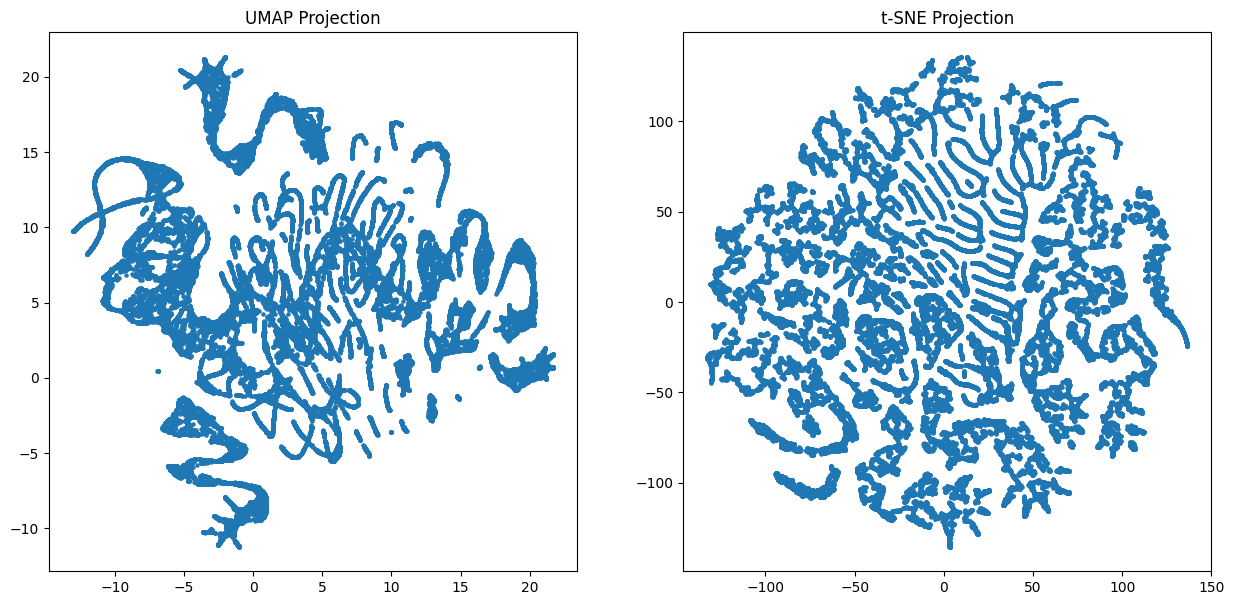

In [8]:
import pandas as pd
import numpy as np
import time
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
file_path = './data/mammoth_a.csv'
data = pd.read_csv(file_path)

# Ensure the data has 3 columns
assert data.shape[1] == 3, "The CSV file must contain 3 columns representing the 3D points."

# Subsample the data to 1000 points
if data.shape[0] > 1000:
    data = data.sample(n=50000, random_state=42)
else:
    print("The dataset has less than or equal to 1000 points, so no subsampling is applied.")

# Extract the 3D points
X = data.values

# Plot the original 3D points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='viridis', s=5)
ax.set_title('Original 3D Points')
plt.show()

# Timing UMAP
start_time = time.time()
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)
umap_time = time.time() - start_time

# Timing t-SNE
start_time = time.time()
tsne_model = TSNE(n_components=2, random_state=42)
X_tsne = tsne_model.fit_transform(X)
tsne_time = time.time() - start_time

# Print the times
print(f"UMAP took {umap_time:.2f} seconds")
print(f"t-SNE took {tsne_time:.2f} seconds")

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(X_umap[:, 0], X_umap[:, 1], cmap='viridis', s=5)
ax[0].set_title('UMAP Projection')

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', s=5)
ax[1].set_title('t-SNE Projection')

plt.show()


/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-01 14:31:07.647592: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 14:31:07.649084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-01 14:31:07.679088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-01 14:31:07.679884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performanc

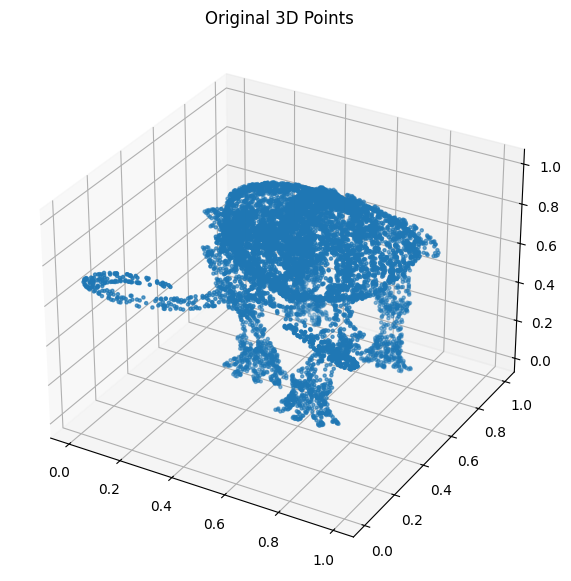

In [7]:
import pandas as pd
import numpy as np
import time
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
file_path = './data/mammoth_a.csv'
DATA = pd.read_csv(file_path)

# Ensure the data has 3 columns
assert DATA.shape[1] == 3, "The CSV file must contain 3 columns representing the 3D points."

# Subsample the data to 1000 points
if DATA.shape[0] > 1000:
    data = DATA.sample(n=10000, random_state=42)
else:
    print("The dataset has less than or equal to 1000 points, so no subsampling is applied.")

# Extract the 3D points
X = data.values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Plot the original 3D points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='viridis', s=5)
ax.set_title('Original 3D Points')
plt.show()


/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_jobs=1, n_neighbors=3, random_state=42, verbose=True)
Thu Aug  1 14:31:11 2024 Construct fuzzy simplicial set
Thu Aug  1 14:31:11 2024 Finding Nearest Neighbors
Thu Aug  1 14:31:11 2024 Building RP forest with 16 trees
Thu Aug  1 14:31:13 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:31:20 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:31:21 2024 Construct embedding


Epochs completed:   2%| ▎          5/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▎         25/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▎        45/200 [00:01]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▎       65/200 [00:02]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▎      85/200 [00:02]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▎     105/200 [00:03]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▎    125/200 [00:04]

	completed  120  /  200 epochs


Epochs completed:  74%| ███████▍   149/200 [00:04]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▎  165/200 [00:05]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▎ 185/200 [00:05]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:06]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:31:37 2024 Finished embedding
UMAP(n_jobs=1, n_neighbors=5, random_state=42, verbose=True)
Thu Aug  1 14:31:37 2024 Construct fuzzy simplicial set
Thu Aug  1 14:31:37 2024 Finding Nearest Neighbors
Thu Aug  1 14:31:37 2024 Building RP forest with 16 trees
Thu Aug  1 14:31:37 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:31:37 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:31:37 2024 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▎         25/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  23%| ██▎        46/200 [00:02]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       64/200 [00:03]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▎      85/200 [00:03]

	completed  80  /  200 epochs


Epochs completed:  53%| █████▎     106/200 [00:04]

	completed  100  /  200 epochs


Epochs completed:  64%| ██████▎    127/200 [00:05]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▎   145/200 [00:06]

	completed  140  /  200 epochs


Epochs completed:  83%| ████████▎  166/200 [00:07]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 184/200 [00:08]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:08]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:32:40 2024 Finished embedding
UMAP(n_jobs=1, n_neighbors=10, random_state=42, verbose=True)
Thu Aug  1 14:32:40 2024 Construct fuzzy simplicial set
Thu Aug  1 14:32:40 2024 Finding Nearest Neighbors
Thu Aug  1 14:32:40 2024 Building RP forest with 16 trees
Thu Aug  1 14:32:41 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:32:41 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:32:41 2024 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  13%| █▎         26/200 [00:01]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        44/200 [00:03]

	completed  40  /  200 epochs


Epochs completed:  33%| ███▎       66/200 [00:04]

	completed  60  /  200 epochs


Epochs completed:  43%| ████▎      86/200 [00:05]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     104/200 [00:06]

	completed  100  /  200 epochs


Epochs completed:  63%| ██████▎    126/200 [00:08]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▏   144/200 [00:09]

	completed  140  /  200 epochs


Epochs completed:  83%| ████████▎  166/200 [00:10]

	completed  160  /  200 epochs


Epochs completed:  93%| █████████▎ 186/200 [00:12]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:13]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:33:22 2024 Finished embedding
UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Aug  1 14:33:22 2024 Construct fuzzy simplicial set
Thu Aug  1 14:33:22 2024 Finding Nearest Neighbors
Thu Aug  1 14:33:22 2024 Building RP forest with 16 trees
Thu Aug  1 14:33:23 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:33:24 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:33:24 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         24/200 [00:03]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:05]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:07]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:09]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     104/200 [00:11]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    124/200 [00:13]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▏   144/200 [00:14]

	completed  140  /  200 epochs


Epochs completed:  83%| ████████▎  166/200 [00:16]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 184/200 [00:17]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:19]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:34:09 2024 Finished embedding
UMAP(n_jobs=1, n_neighbors=20, random_state=42, verbose=True)
Thu Aug  1 14:34:09 2024 Construct fuzzy simplicial set
Thu Aug  1 14:34:09 2024 Finding Nearest Neighbors
Thu Aug  1 14:34:09 2024 Building RP forest with 16 trees
Thu Aug  1 14:34:10 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:34:11 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:34:11 2024 Construct embedding


Epochs completed:   3%| ▎          6/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  13%| █▎         26/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  23%| ██▎        46/200 [00:04]

	completed  40  /  200 epochs


Epochs completed:  33%| ███▎       66/200 [00:06]

	completed  60  /  200 epochs


Epochs completed:  43%| ████▎      86/200 [00:07]

	completed  80  /  200 epochs


Epochs completed:  53%| █████▎     106/200 [00:09]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    124/200 [00:11]

	completed  120  /  200 epochs


Epochs completed:  73%| ███████▎   146/200 [00:13]

	completed  140  /  200 epochs


Epochs completed:  83%| ████████▎  166/200 [00:14]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 184/200 [00:16]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:17]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:34:47 2024 Finished embedding
UMAP(n_jobs=1, n_neighbors=50, random_state=42, verbose=True)
Thu Aug  1 14:34:47 2024 Construct fuzzy simplicial set
Thu Aug  1 14:34:47 2024 Finding Nearest Neighbors
Thu Aug  1 14:34:47 2024 Building RP forest with 16 trees
Thu Aug  1 14:34:47 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:34:54 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:34:54 2024 Construct embedding


Epochs completed:   2%| ▎          5/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         23/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        43/200 [00:04]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:07]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      83/200 [00:09]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     103/200 [00:12]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:14]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:16]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:19]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 183/200 [00:21]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:23]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
/home/modrzyk/miniconda3/envs/Manim/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thu Aug  1 14:35:29 2024 Finished embedding
UMAP(n_jobs=1, n_neighbors=100, random_state=42, verbose=True)
Thu Aug  1 14:35:30 2024 Construct fuzzy simplicial set
Thu Aug  1 14:35:30 2024 Finding Nearest Neighbors
Thu Aug  1 14:35:30 2024 Building RP forest with 16 trees
Thu Aug  1 14:35:30 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Aug  1 14:35:54 2024 Finished Nearest Neighbor Search
Thu Aug  1 14:35:56 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:05]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:08]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      83/200 [00:11]

	completed  80  /  200 epochs


Epochs completed:  52%| █████▏     103/200 [00:14]

	completed  100  /  200 epochs


Epochs completed:  62%| ██████▏    123/200 [00:16]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:19]

	completed  140  /  200 epochs


Epochs completed:  82%| ████████▏  163/200 [00:22]

	completed  160  /  200 epochs


Epochs completed:  92%| █████████▏ 183/200 [00:25]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:27]
/tmp/ipykernel_971956/216590430.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)


Thu Aug  1 14:36:37 2024 Finished embedding


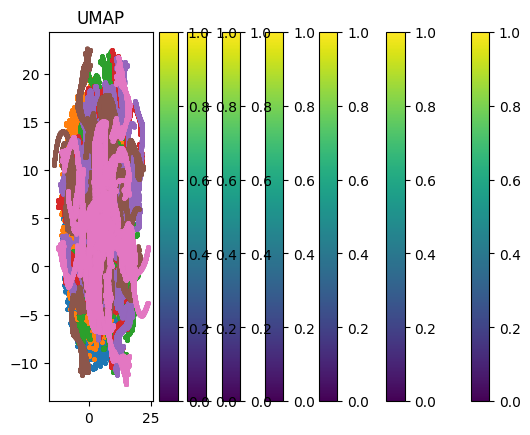

In [8]:

np.random.seed(42)
values = [3, 5, 10, 15, 20, 50, 100]
data = DATA.sample(n=50000, random_state=42)
X = data.values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

for n_neighbors in values:

    # Timing UMAP
    umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors, min_dist=0.1, verbose=True)
    X_umap = umap_model.fit_transform(X)
    
    np.save(f'./data/mammoth_umap_{n_neighbors}.npy', X_umap)
    # Plotting the results
    plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='tab10', s=5)
    plt.colorbar()
    plt.title('UMAP')

/tmp/ipykernel_971956/2227342672.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], cmap='tab10', s=5)


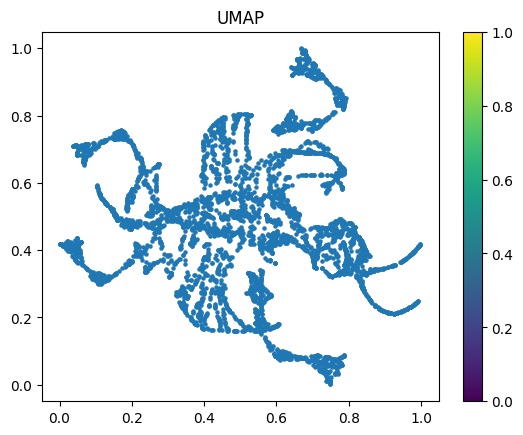

In [16]:
import numpy as np

data = np.load("data/mammoth_umap_.npy", allow_pickle=True)
data = (data - np.min(data, axis=0)) / (
    np.max(data, axis=0) - np.min(data, axis=0)
)
indices = np.random.choice(data.shape[0], 5000, replace=False)
data = data[indices]

plt.scatter(data[:, 0], data[:, 1], cmap='tab10', s=5)
plt.colorbar()
plt.title('UMAP')
plt.show()

